# Contents
- [Features only vs. baseline](#Features-only-vs.-baseline)
- [Features filtered only vs. baseline](#Features-filtered-only-vs.-baseline)
- [Baseline features filtered with new features vs. baseline](#Baseline-features-filtered-with-new-features-vs.-baseline)
- [Baseline features filtered with new features filtered vs. baseline](#Baseline-features-filtered-with-new-features-filtered-vs.-baseline)

In [225]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from constants import *

Load the results Dataframe


In [226]:
df_results = pd.read_feather(RESULTS_FILE_PATH)
df_results.head()

dataset_id   dataset_name  task_id  n_classes  n_features  n_samples  \
0           3       kr-vs-kp        3          2          36       3196   
1           6         letter        6         26          16      20000   
2          11  balance-scale       11          3           4        625   
3          12  mfeat-factors       12         10         216       2000   
4          14  mfeat-fourier       14         10          76       2000   

   n_features_ohe  n_features_filtered  pca_clean_n_features_created  \
0              73                   60                             1   
1              16                   13                             1   
2               4                    4                             2   
3             216                   73                             3   
4              76                   20                             1   

   pca_clean_creation_time_seconds  kpca_clean_n_features_created  \
0                         3.658458                              1   
1                        13.803269                              1   
2                         0.426095                              1   
3                         6.308460                              2   
4                         3.546795                              1   

   kpca_clean_creation_time_seconds  umap_clean_n_features_created  \
0                          6.783027                              1   
1                         82.972428                              2   
2                          0.563126                              2   
3                          6.494139                              2   
4                          4.710817                              1   

   umap_clean_creation_time_seconds  kmeans_clean_n_features_created  \
0                         37.268224                                1   
1                        143.765481                                1   
2                         12.597098                                1   
3                         26.177087                                1   
4                         24.058391                                1   

   kmeans_clean_creation_time_seconds  lda_clean_n_features_created  \
0                           12.216738                             1   
1                           64.153267                             1   
2                            4.977115                             1   
3                            8.672944                             9   
4                            8.124455                             9   

   lda_clean_creation_time_seconds  autoencoder_clean_n_features_created  \
0                         0.346189                                     8   
1                        19.374164                                     4   
2                         0.291065                                     2   
3                         4.281974                                    10   
4                         2.685348                                     8   

   autoencoder_clean_creation_time_seconds  pca_filtered_n_features_created  \
0                                 6.546732                                2   
1                                26.587504                                1   
2                                 2.982464                                2   
3                                 3.953141                                2   
4                                 4.040147                                3   

   pca_filtered_creation_time_seconds  kpca_filtered_n_features_created  \
0                            2.476264                                 3   
1                           13.489147                                 1   
2                            0.420094                                 1   
3                            3.032679                                 2   
4                            2.892648                                 1   

   kpca_filtered_creation_time_seconds  

In [227]:
for column in df_results.columns:
    print(column)

dataset_id
dataset_name
task_id
n_classes
n_features
n_samples
n_features_ohe
n_features_filtered
pca_clean_n_features_created
pca_clean_creation_time_seconds
kpca_clean_n_features_created
kpca_clean_creation_time_seconds
umap_clean_n_features_created
umap_clean_creation_time_seconds
kmeans_clean_n_features_created
kmeans_clean_creation_time_seconds
lda_clean_n_features_created
lda_clean_creation_time_seconds
autoencoder_clean_n_features_created
autoencoder_clean_creation_time_seconds
pca_filtered_n_features_created
pca_filtered_creation_time_seconds
kpca_filtered_n_features_created
kpca_filtered_creation_time_seconds
umap_filtered_n_features_created
umap_filtered_creation_time_seconds
kmeans_filtered_n_features_created
kmeans_filtered_creation_time_seconds
lda_filtered_n_features_created
lda_filtered_creation_time_seconds
autoencoder_filtered_n_features_created
autoencoder_filtered_creation_time_seconds
baseline_filtered_train_cv_score
baseline_filtered_test_score
baseline_filtered_tr

# Features only vs. baseline

In [228]:
df = df_results.loc[:, df_results.columns.str.contains("only_[a-zA-Z]+_test_score_change_to_baseline_filtered|dataset_id", regex=True)]
df.head()

,dataset_id,only_pca_test_score_change_to_baseline_filtered,only_kpca_test_score_change_to_baseline_filtered,only_kmeans_test_score_change_to_baseline_filtered,only_lda_test_score_change_to_baseline_filtered,only_umap_test_score_change_to_baseline_filtered,only_autoencoder_test_score_change_to_baseline_filtered
0,3,-41.981132,-44.622642,-44.905660,-2.358491,-31.886792,-6.037736
1,6,-86.242899,-87.317672,-94.365116,-79.487179,-26.193766,-35.360049
2,11,-36.021505,-34.946237,-10.752688,3.763441,-18.817204,-23.655914
3,12,-22.119816,-42.396313,-29.953917,2.764977,-5.837174,-4.147465
4,14,-66.782007,-67.128028,-81.833910,-1.903114,-25.951557,-17.128028


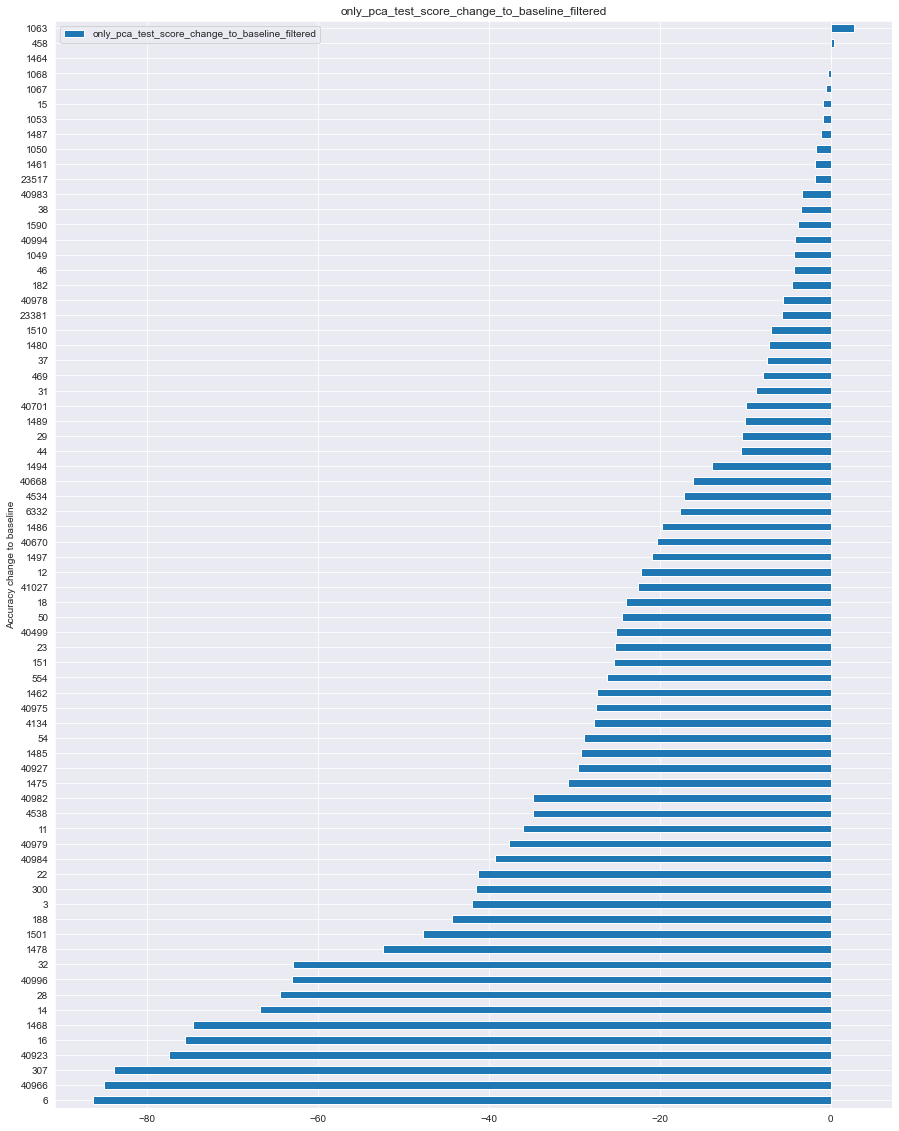

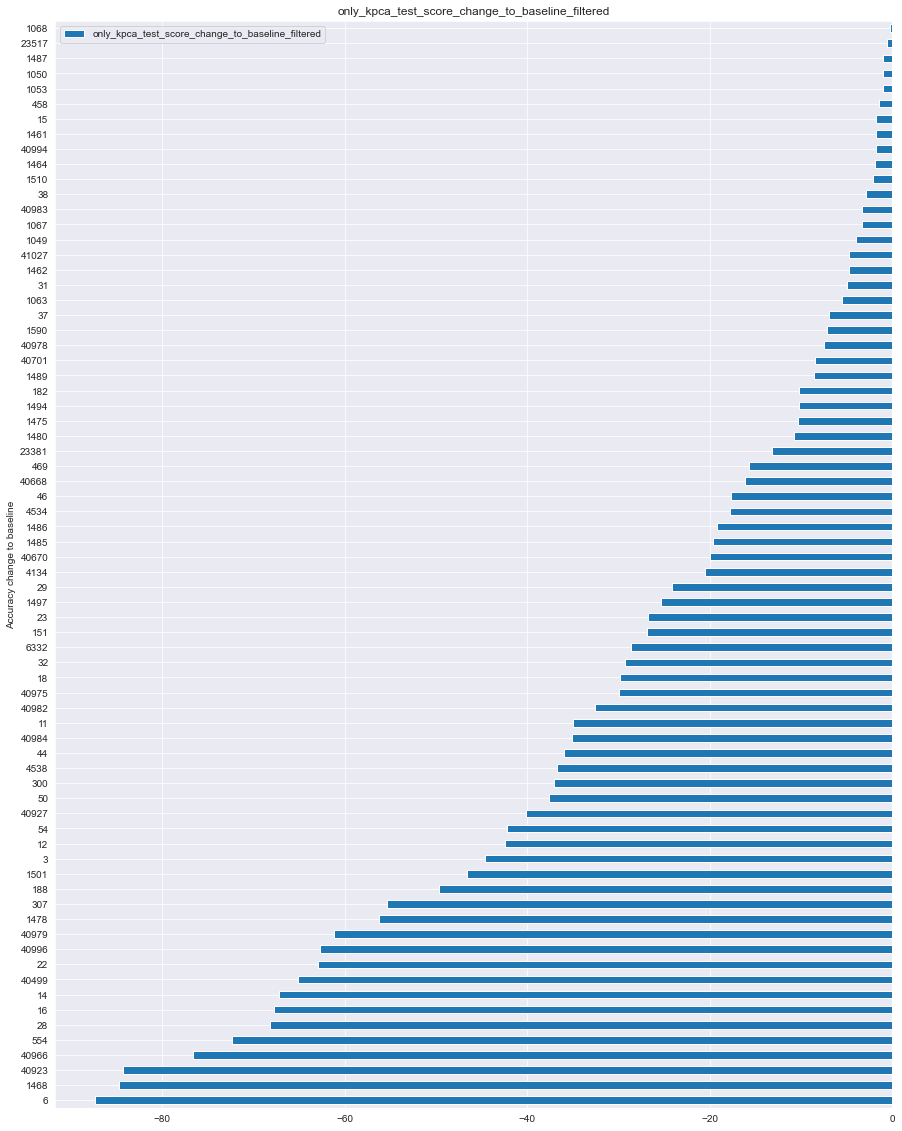

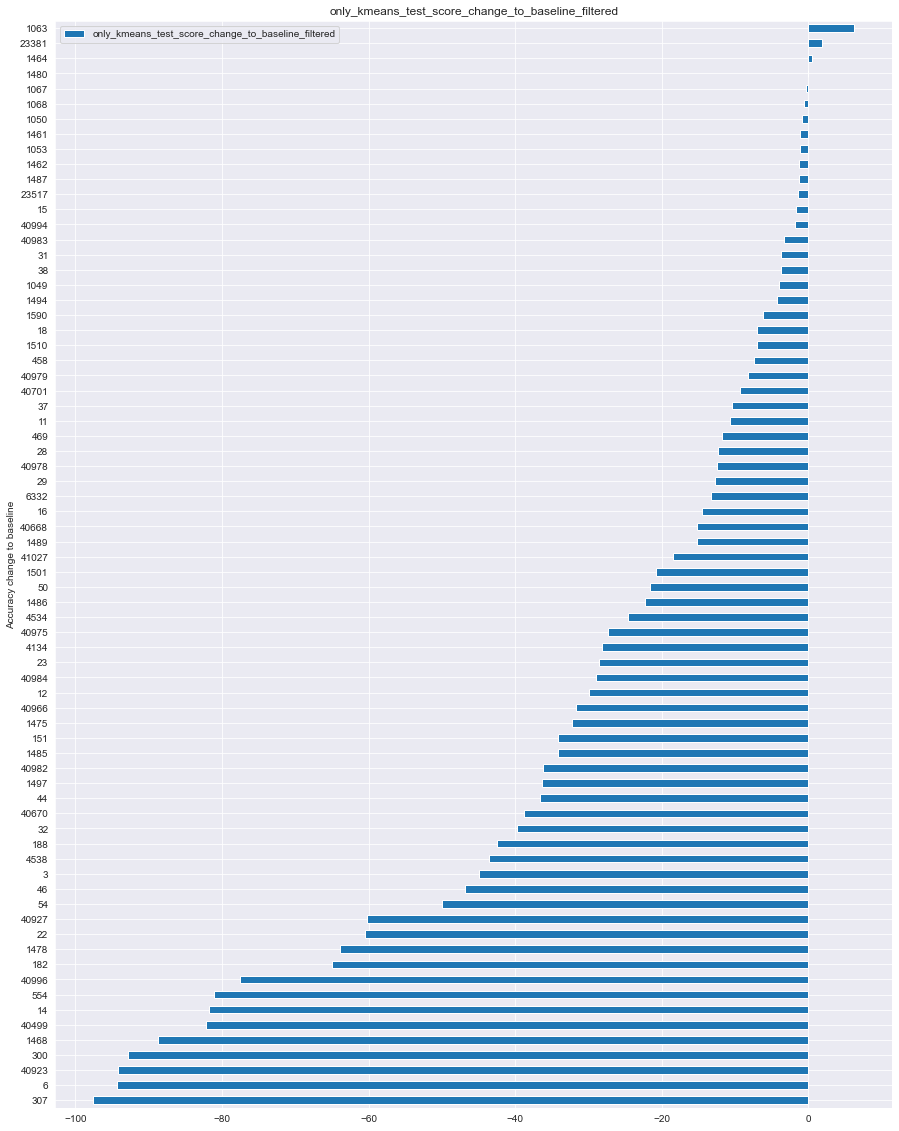

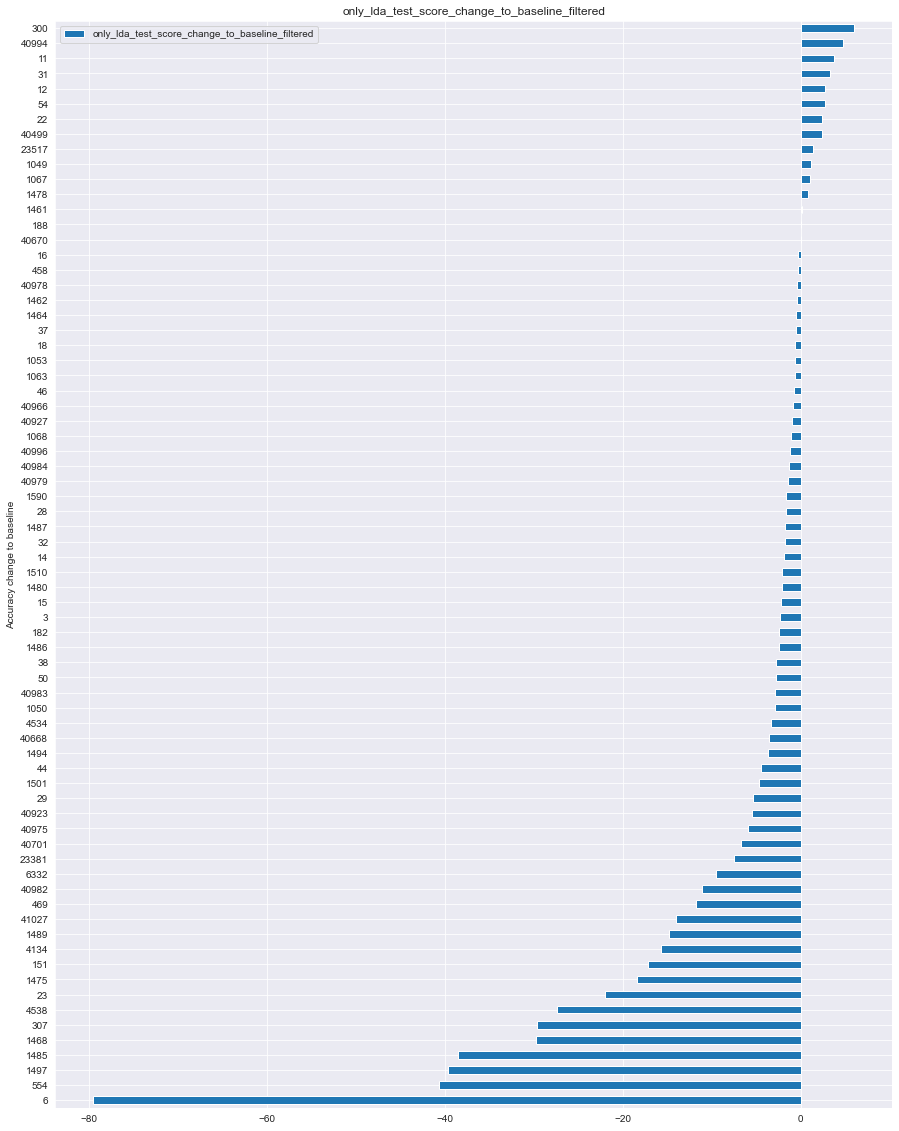

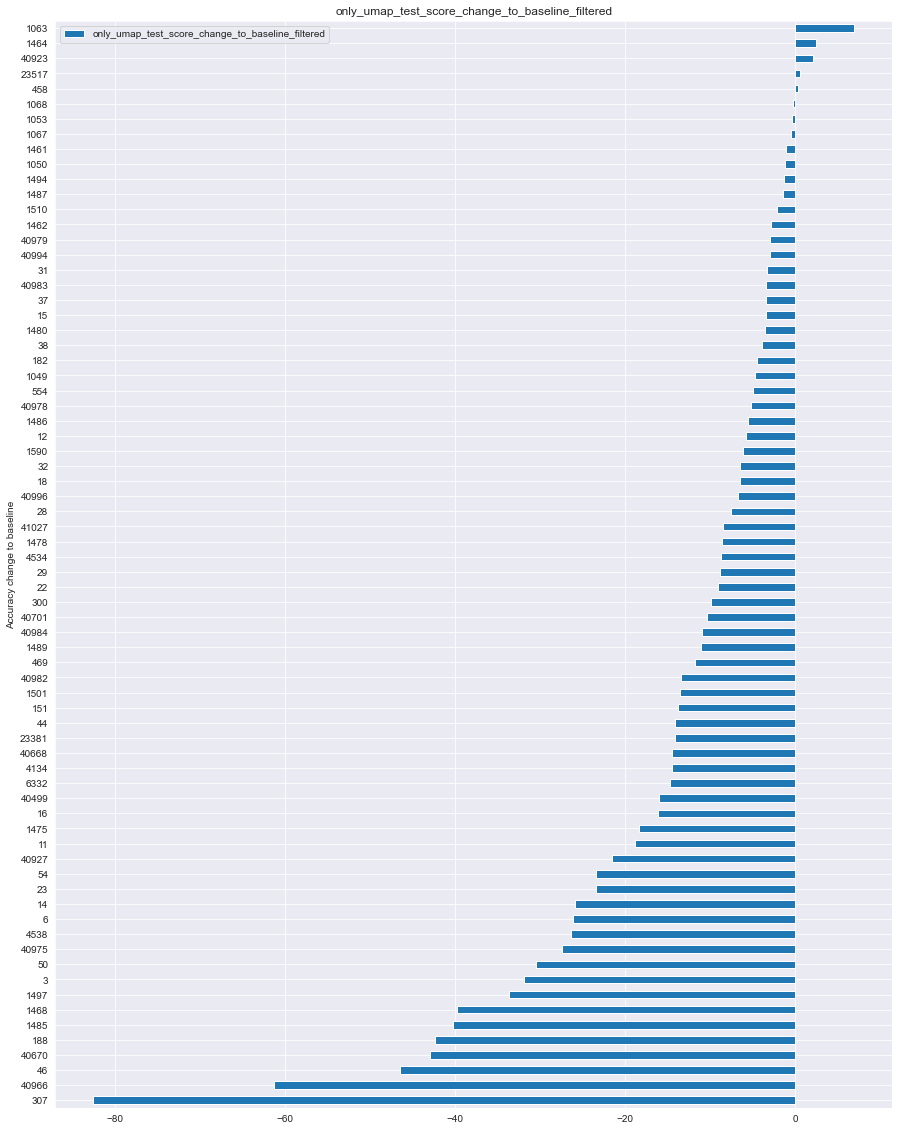

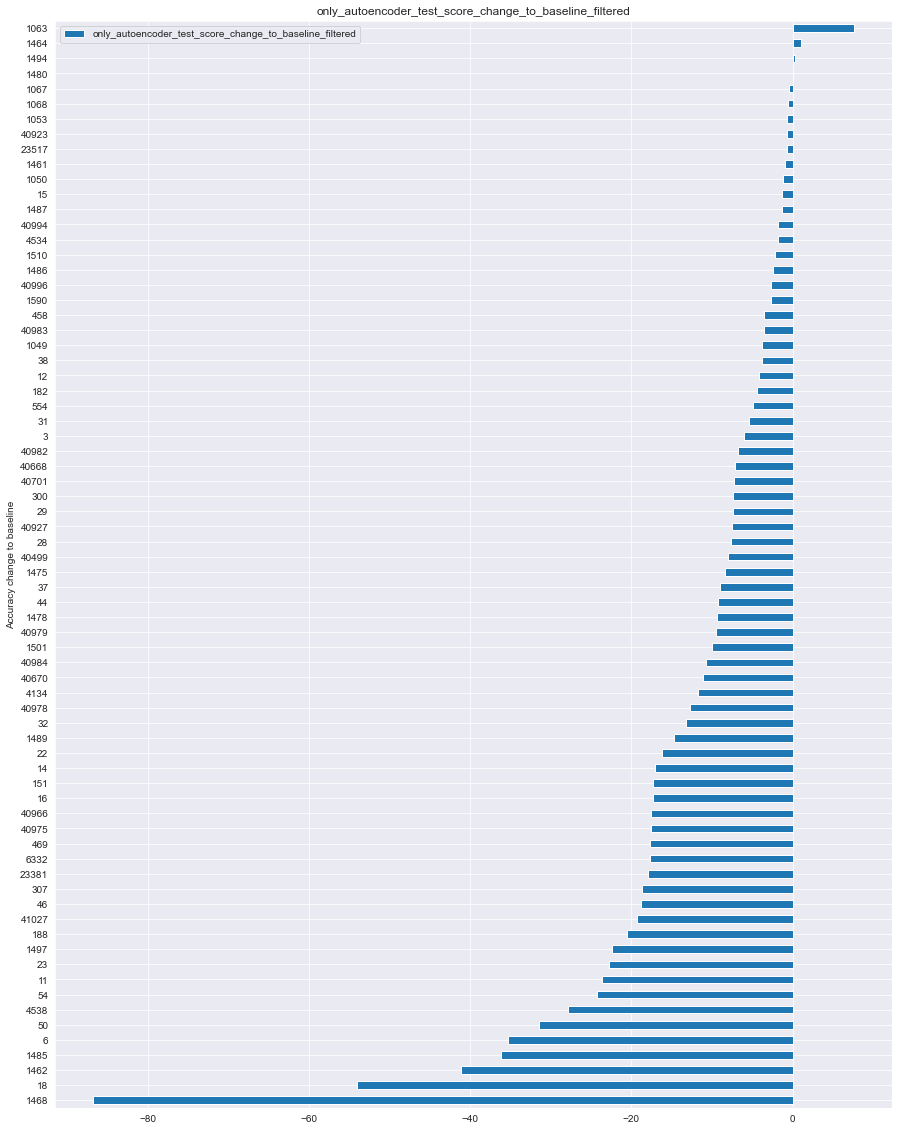

In [229]:
df_feature_columns = list(df.columns)
df_feature_columns.remove("dataset_id")

for feature_column in df_feature_columns:
    df[["dataset_id", feature_column]].\
        sort_values(
            by=feature_column,
            ascending=True,
        ).\
        plot.barh(
            x="dataset_id",
            y=feature_column,
            #color=(df[feature_column] > 0).map({True: 'g', False:'r'}), # do not work
            figsize=(15, 20),
            title=feature_column,
            grid=True,
            xlabel="Accuracy change to baseline",
            ylabel="Dataset id",
    )


# Features filtered only vs. baseline


In [230]:
df = df_results.loc[:, df_results.columns.str.contains("only_[a-zA-Z]+_filtered_test_score_change_to_baseline_filtered|dataset_id", regex=True)]
df.head()

,dataset_id,only_pca_filtered_test_score_change_to_baseline_filtered,only_kpca_filtered_test_score_change_to_baseline_filtered,only_kmeans_filtered_test_score_change_to_baseline_filtered,only_lda_filtered_test_score_change_to_baseline_filtered,only_umap_filtered_test_score_change_to_baseline_filtered,only_autoencoder_filtered_test_score_change_to_baseline_filtered
0,3,-33.301887,-25.188679,-25.094340,-3.207547,-29.433962,-4.811321
1,6,-78.473822,-77.015200,-54.629203,-73.760172,-40.380777,-30.370029
2,11,-36.021505,-34.946237,-10.752688,3.763441,-18.817204,-47.849462
3,12,-31.797235,-32.565284,-25.960061,0.153610,-6.605223,-3.686636
4,14,-15.397924,-46.539792,-35.640138,-2.422145,-9.861592,-13.321799


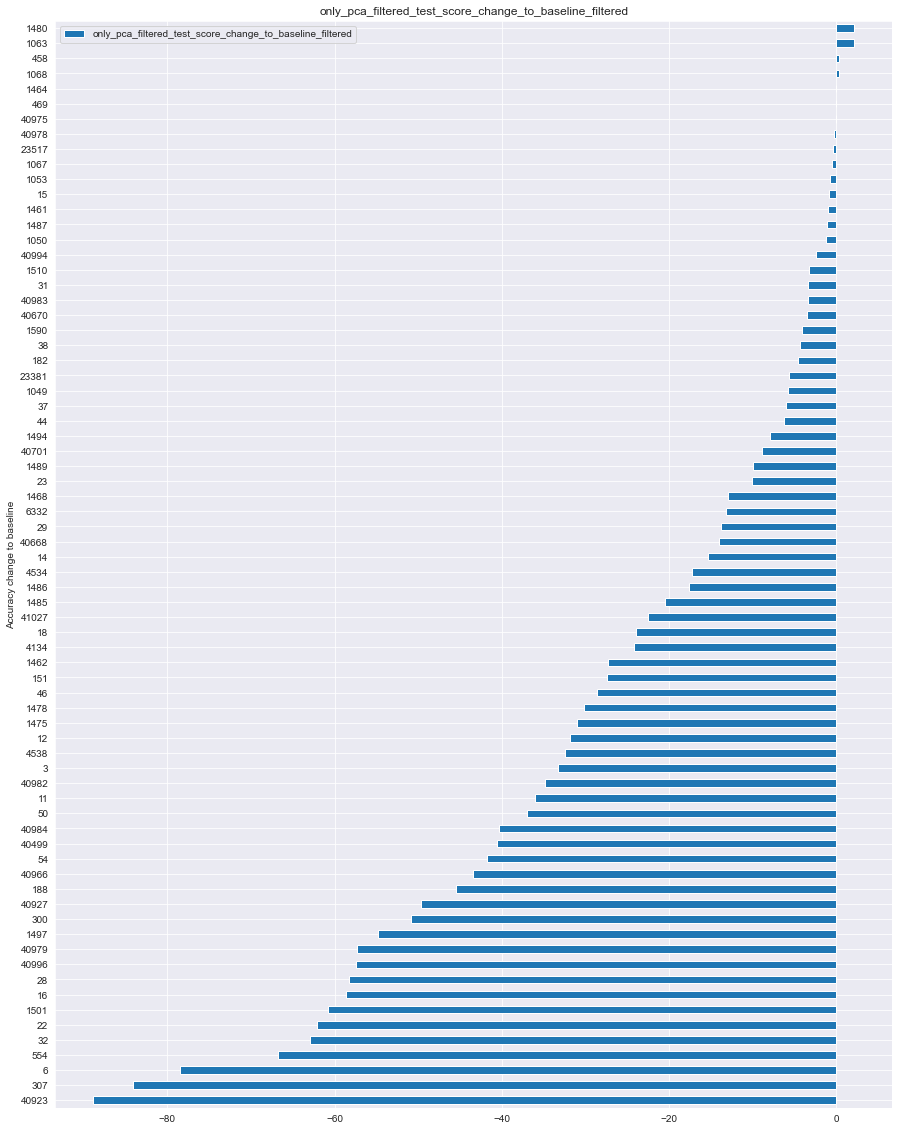

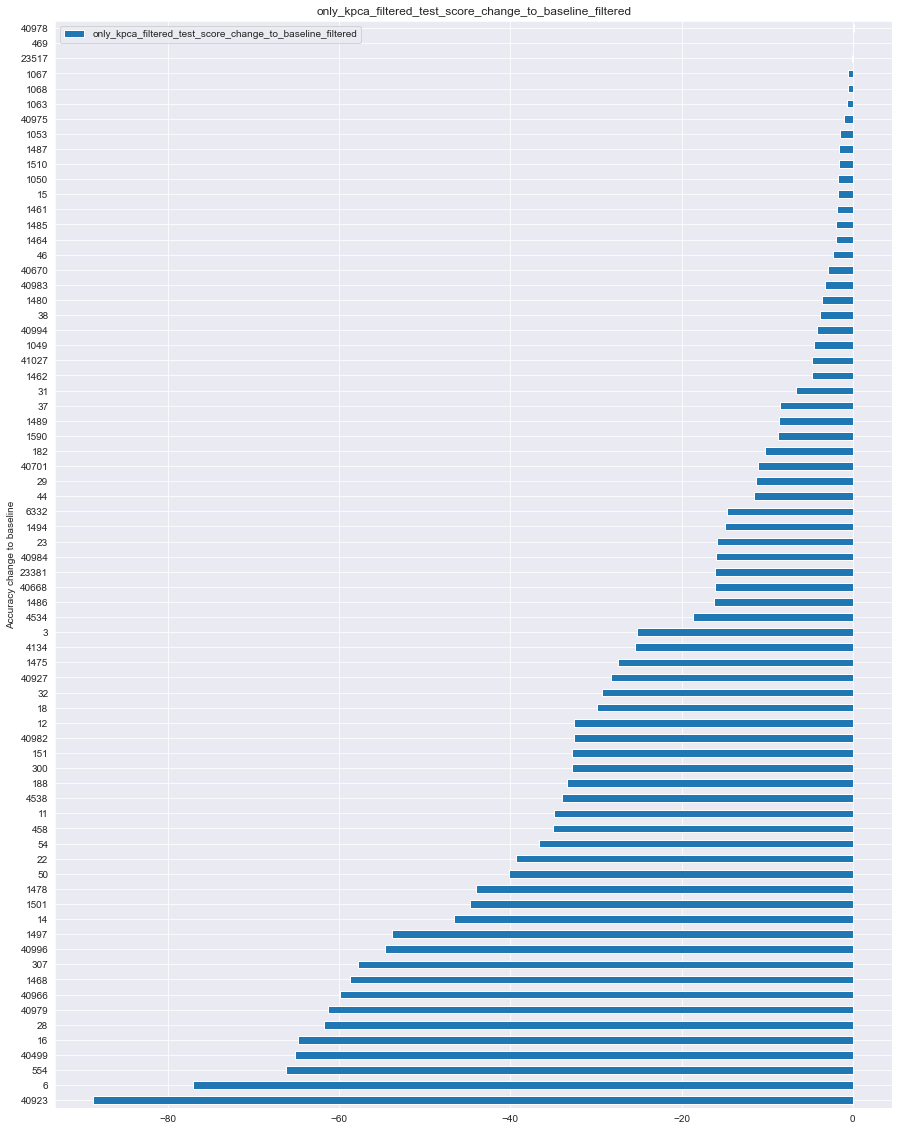

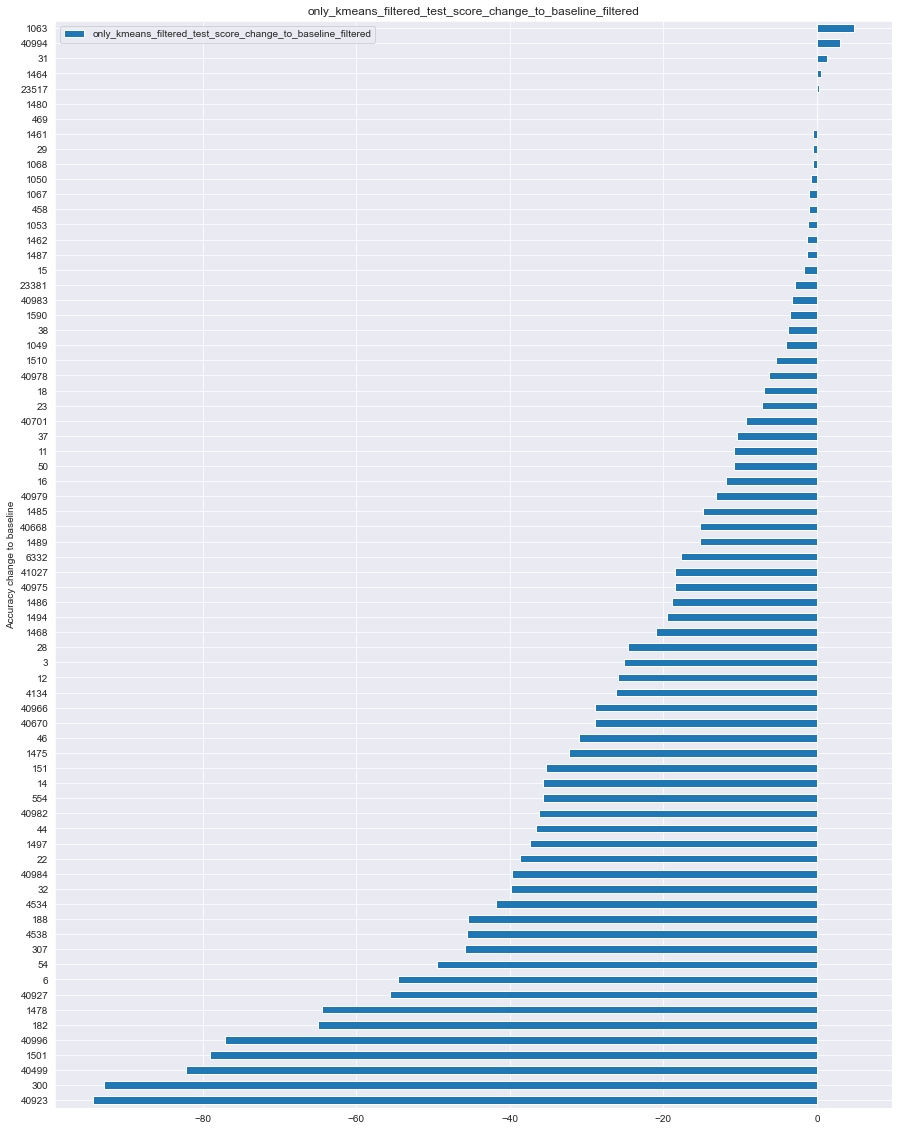

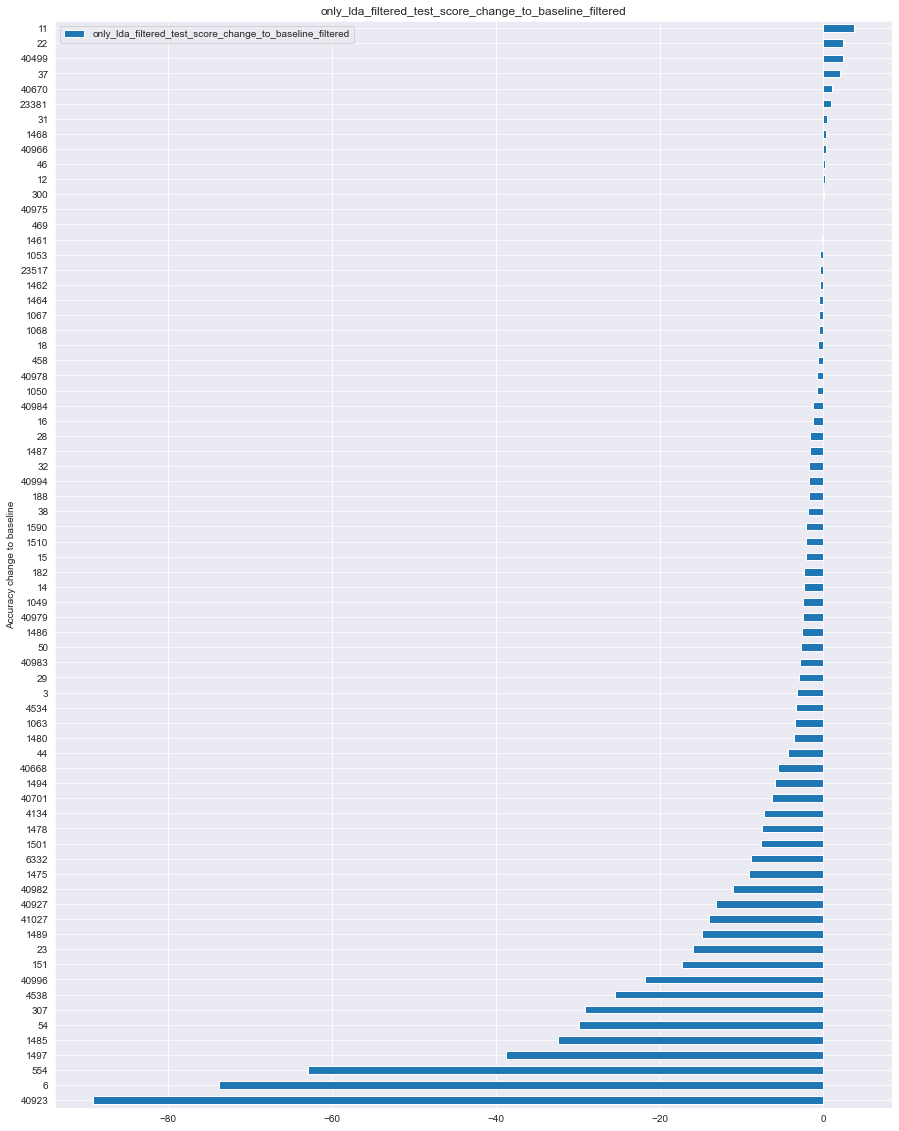

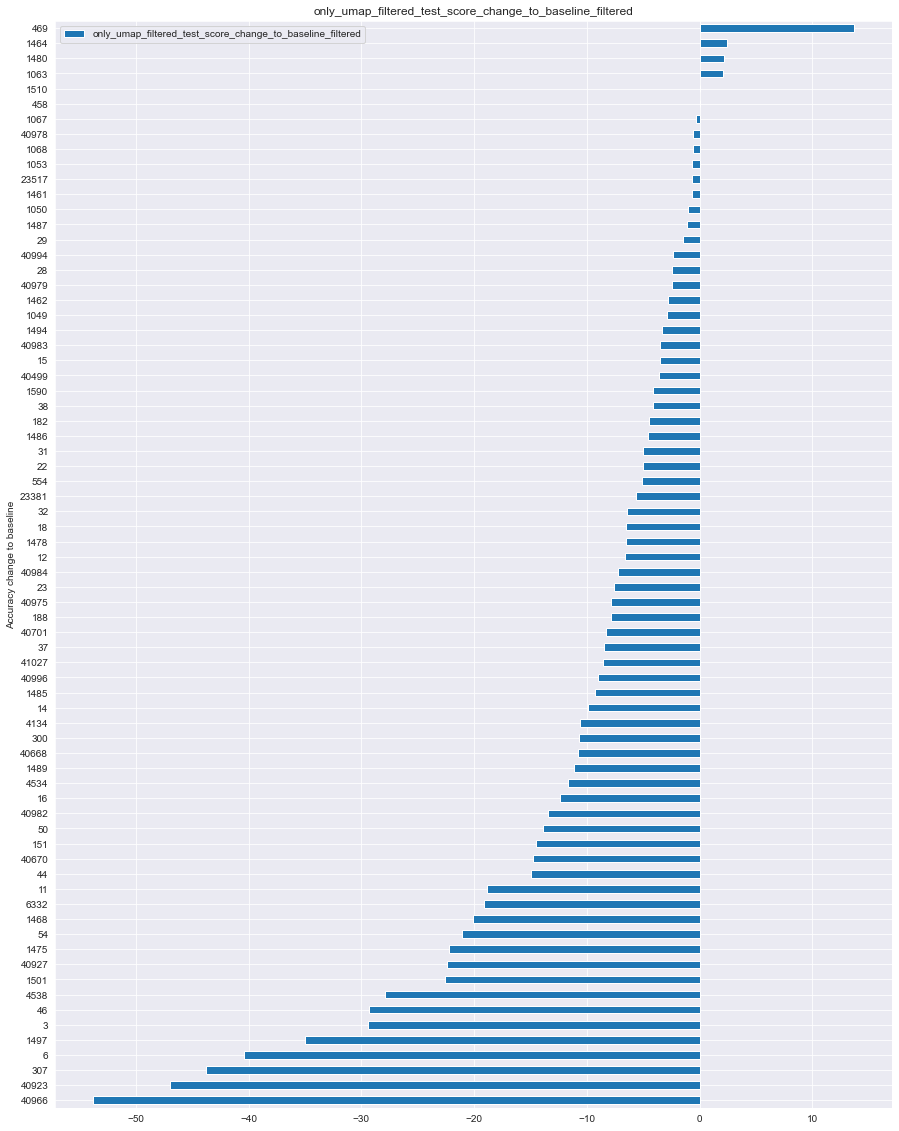

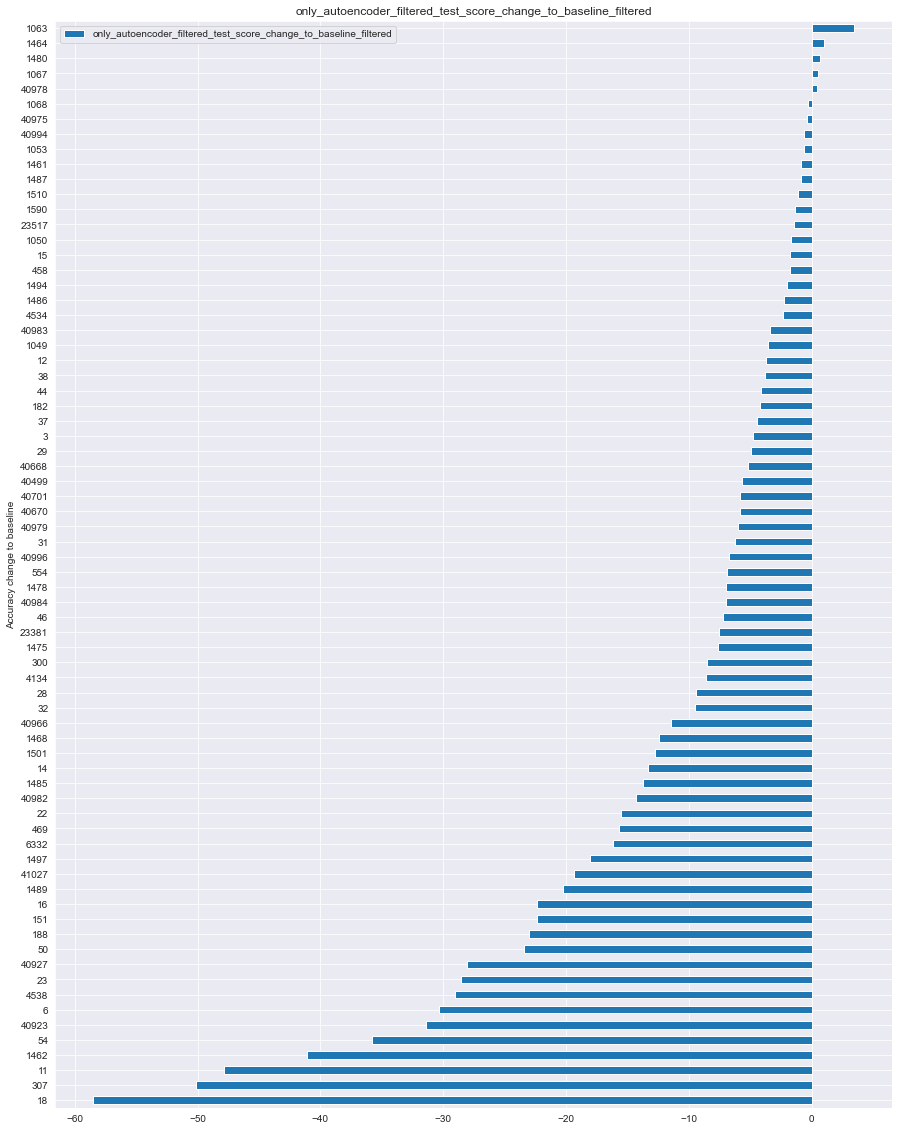

In [231]:
df_feature_columns = list(df.columns)
df_feature_columns.remove("dataset_id")

for feature_column in df_feature_columns:
    df[["dataset_id", feature_column]].\
        sort_values(
            by=feature_column,
            ascending=True,
        ).\
        plot.barh(
            x="dataset_id",
            y=feature_column,
            #color=(df[feature_column] > 0).map({True: 'g', False:'r'}), # do not work
            figsize=(15, 20),
            title=feature_column,
            grid=True,
            xlabel="Accuracy change to baseline",
            ylabel="Dataset id",
    )

# Baseline features filtered with new features vs. baseline

In [232]:
df = df_results.loc[:, df_results.columns.str.contains("baseline_filtered_[a-zA-Z]+_test_score_change_to_baseline_filtered|dataset_id", regex=True)]
df.head()

,dataset_id,baseline_filtered_pca_test_score_change_to_baseline_filtered,baseline_filtered_kpca_test_score_change_to_baseline_filtered,baseline_filtered_kmeans_test_score_change_to_baseline_filtered,baseline_filtered_lda_test_score_change_to_baseline_filtered,baseline_filtered_umap_test_score_change_to_baseline_filtered,baseline_filtered_autoencoder_test_score_change_to_baseline_filtered
0,3,0.377358,0.660377,0.188679,1.415094,0.943396,0.754717
1,6,-0.399202,0.230309,0.245663,-0.168893,-0.214955,-1.059420
2,11,-1.075269,-1.075269,-3.225806,5.376344,-3.763441,-1.612903
3,12,-0.153610,0.153610,-0.307220,2.611367,-0.614439,-0.460829
4,14,0.000000,-0.173010,-0.692042,-1.730104,0.000000,-0.865052


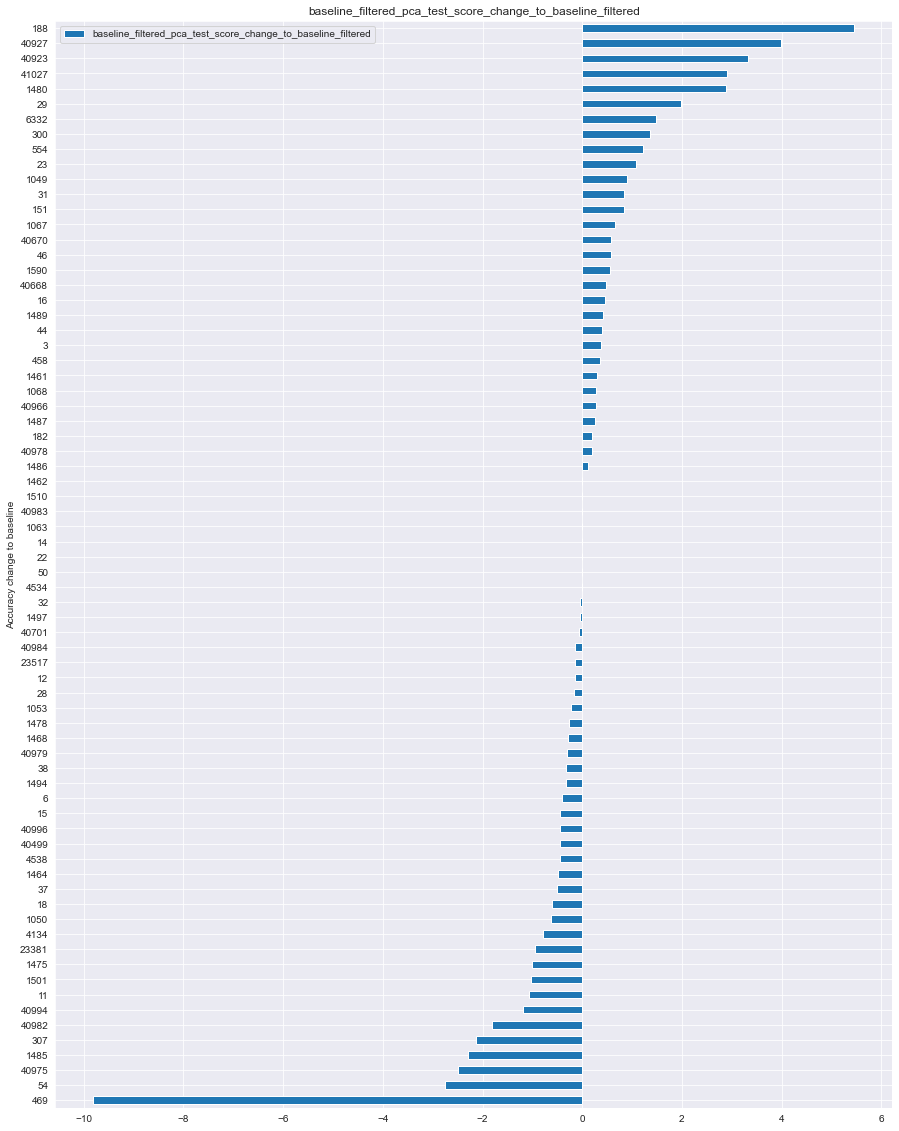

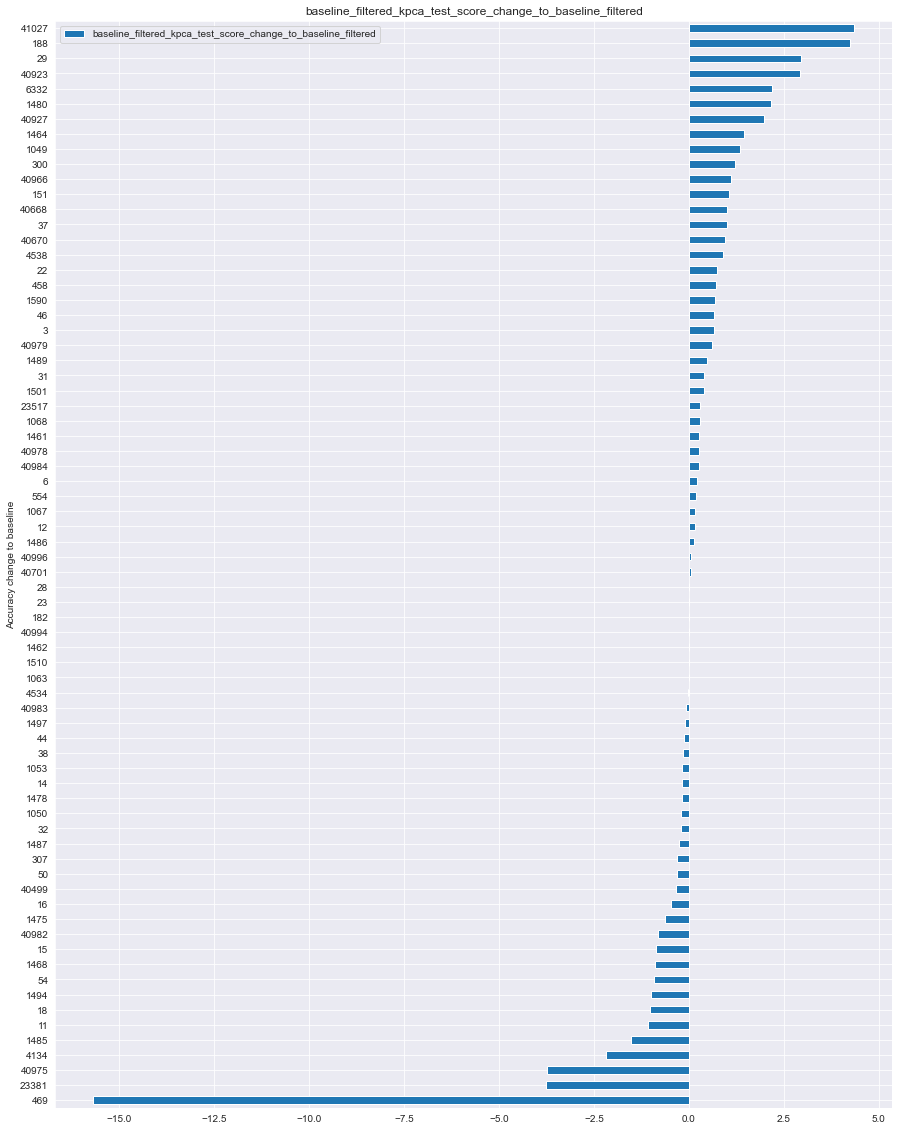

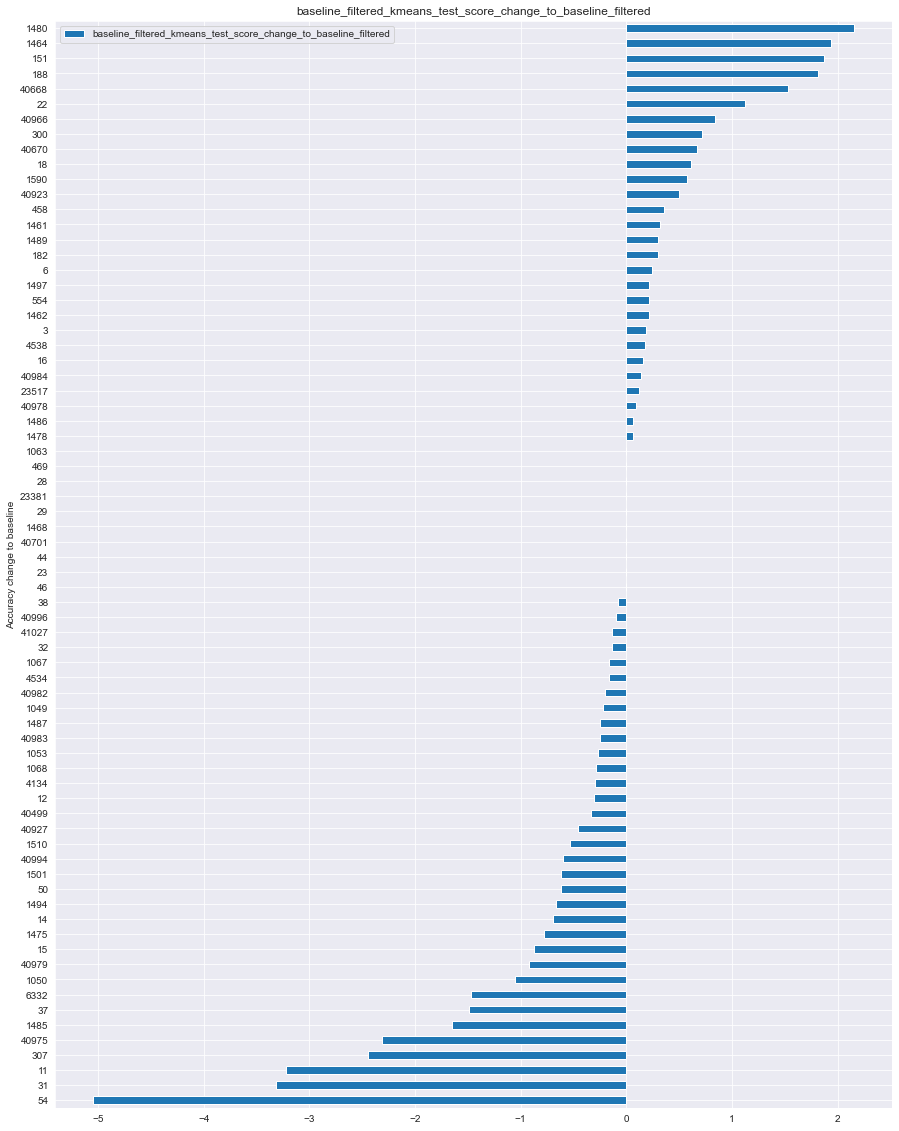

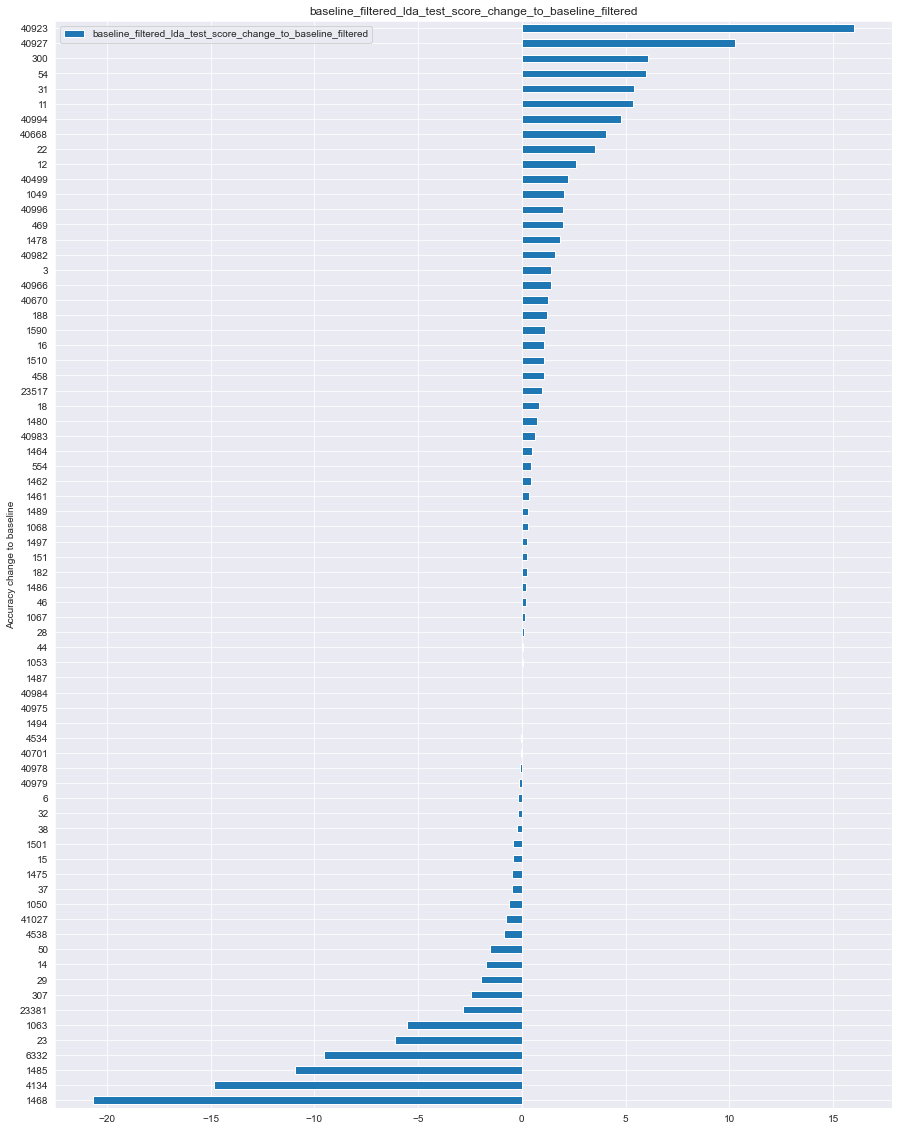

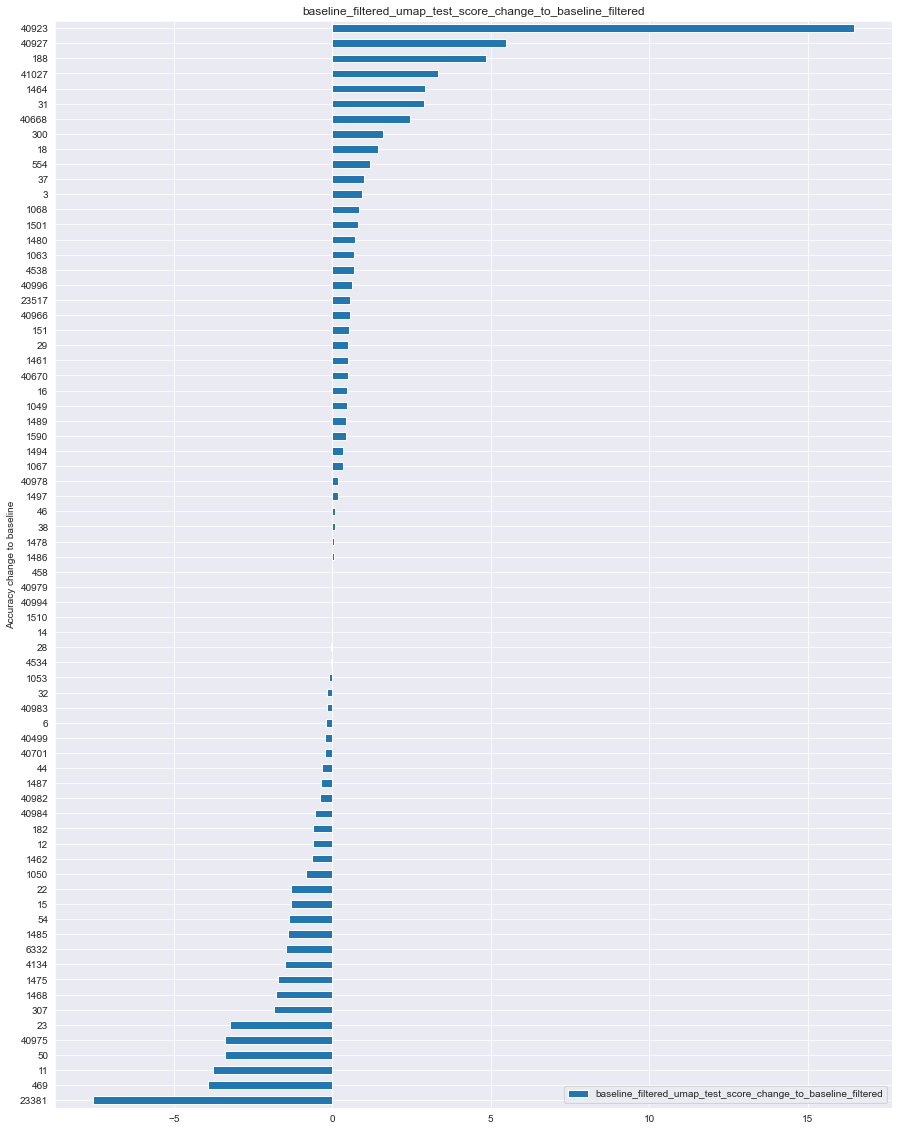

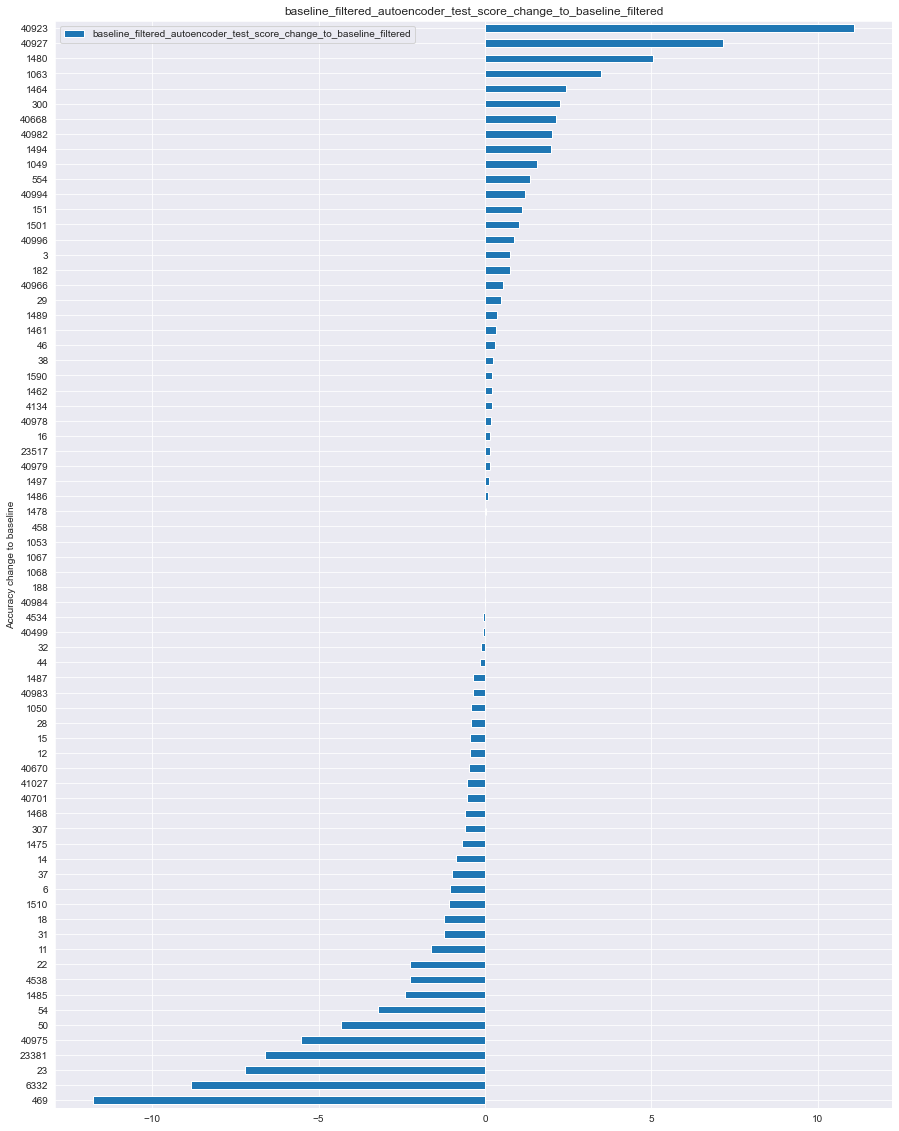

In [233]:
df_feature_columns = list(df.columns)
df_feature_columns.remove("dataset_id")

for feature_column in df_feature_columns:
    df[["dataset_id", feature_column]].\
        sort_values(
            by=feature_column,
            ascending=True,
        ).\
        plot.barh(
            x="dataset_id",
            y=feature_column,
            #color=(df[feature_column] > 0).map({True: 'g', False:'r'}), # do not work
            figsize=(15, 20),
            title=feature_column,
            grid=True,
            xlabel="Accuracy change to baseline",
            ylabel="Dataset id",
    )

# Baseline features filtered with new features filtered vs. baseline

In [234]:
df = df_results.loc[:, df_results.columns.str.contains("baseline_filtered_[a-zA-Z]+_filtered_test_score_change_to_baseline_filtered|dataset_id|dataset_name", regex=True)]
df.head()

,dataset_id,dataset_name,baseline_filtered_pca_filtered_test_score_change_to_baseline_filtered,baseline_filtered_kpca_filtered_test_score_change_to_baseline_filtered,baseline_filtered_kmeans_filtered_test_score_change_to_baseline_filtered,baseline_filtered_lda_filtered_test_score_change_to_baseline_filtered,baseline_filtered_umap_filtered_test_score_change_to_baseline_filtered,baseline_filtered_autoencoder_filtered_test_score_change_to_baseline_filtered
0,3,kr-vs-kp,0.000000,0.283019,0.094340,0.377358,0.094340,0.188679
1,6,letter,-0.245663,-0.291724,-0.138185,0.061416,-0.168893,-0.875173
2,11,balance-scale,-1.075269,-1.075269,-3.225806,5.376344,-3.763441,0.537634
3,12,mfeat-factors,-0.153610,0.153610,-0.460829,1.843318,0.460829,-0.307220
4,14,mfeat-fourier,-1.384083,0.692042,-0.346021,-0.173010,-1.211073,-1.038062


In [235]:
df_feature_columns = list(df.columns)
df_feature_columns.remove("dataset_id")
df_feature_columns.remove("dataset_name")
n_datasets = len(df_results)

list_improved = []
list_unchanged = []
list_decreased = []
list_featurename = []
set_improved_dataset_name = set()

for feature_column in df_feature_columns:
    # get amount of improved, unchanged and decreased dataset performances
    improved = sum(df[feature_column] > 0)
    unchanged = sum(df[feature_column] == 0)
    decrease = sum(df[feature_column] < 0)

    # get datasets which are improved
    improved_dataset_names = df[df[feature_column] > 0]["dataset_name"]
    set_improved_dataset_name.update(list(improved_dataset_names))

    feature_name = feature_column.split("_")[2].upper()

    list_improved.append(improved)
    list_unchanged.append(unchanged)
    list_decreased.append(decrease)
    list_featurename.append(feature_name)

#
print(f"Total improved Datasets over all features: {len(set_improved_dataset_name)} ({round(len(set_improved_dataset_name)/ n_datasets, 2)}%)")
print()

feature_results_df = pd.DataFrame(data={"feature_name": list_featurename, "improved": list_improved, "unchanged": list_unchanged, "decreased": list_decreased})
print("Anzahl Datasets")
print(feature_results_df)

feature_results_df_normalized = feature_results_df.copy()[["improved", "unchanged", "decreased"]]
feature_results_df_normalized = feature_results_df_normalized.div(feature_results_df_normalized.sum(axis=1), axis=0)

feature_results_df_normalized.insert(loc=0, column="feature_name", value=feature_results_df["feature_name"])
feature_results_df_normalized = feature_results_df_normalized.round(decimals=2)

print()
print("Prozent Datasets")
print(feature_results_df_normalized)

Total improved Datasets over all features: 61 (0.85%)

Anzahl Datasets
  feature_name  improved  unchanged  decreased
0          PCA        30          9         33
1         KPCA        32         10         30
2       KMEANS        23          7         42
3          LDA        41          3         28
4         UMAP        28          3         41
5  AUTOENCODER        25          5         42

Prozent Datasets
  feature_name  improved  unchanged  decreased
0          PCA      0.42       0.12       0.46
1         KPCA      0.44       0.14       0.42
2       KMEANS      0.32       0.10       0.58
3          LDA      0.57       0.04       0.39
4         UMAP      0.39       0.04       0.57
5  AUTOENCODER      0.35       0.07       0.58


C:\Users\jonas\AppData\Local\Temp\ipykernel_15508\1145828818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["best_feature"] = highest_values


<AxesSubplot:>

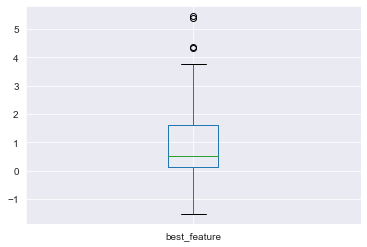

In [241]:
highest_values = df[df_feature_columns].max(axis="columns")
df["best_feature"] = highest_values
df.boxplot(column="best_feature")

In [242]:
# all datasets
df["best_feature"].describe()

count    72.000000
mean      1.066504
std       1.396525
min      -1.529052
25%       0.142494
50%       0.515501
75%       1.621151
max       5.454545
Name: best_feature, dtype: float64

In [244]:
# only improved datasets
df[df["best_feature"] > 0]["best_feature"].describe()

count    61.000000
mean      1.322765
std       1.356692
min       0.061416
25%       0.317579
50%       0.822368
75%       1.843318
max       5.454545
Name: best_feature, dtype: float64

<AxesSubplot:>

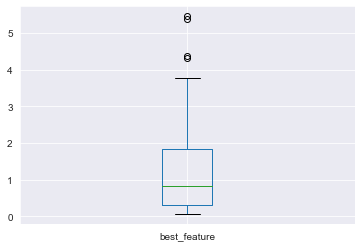

In [246]:
df[df["best_feature"] > 0].boxplot(column="best_feature")

In [ ]:
for feature_column in df_feature_columns:
    df_temp = df[["dataset_name", feature_column]].\
        sort_values(
            by=feature_column,
            ascending=True,
        )

    df_temp.plot.barh(
            x="dataset_name",
            y=feature_column,
            color=(df_temp[feature_column] > 0).map({True: 'g', False:'r'}),
            figsize=(15, 20),
            title=feature_column.split("_")[2].upper(),
            grid=True,
            xlabel="Accuracy change to baseline in %",
            ylabel="Datasetname",
            legend=False,
    )